<a href="https://colab.research.google.com/github/nailah21400/HU-DATA-200/blob/main/MEPS_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Google Drive Connection (For Colab use only)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Research Question: How do insurance coverage, race, and English proficiency affect health outcomes for individuals diagnosed with speech and language disorders?

Primary hypothesis: Individuals with Medicaid or no insurance will report worse health outcomes compared to those with private insurance.

 This project aims to provide the following analysis: Descriptive stats will describe the frequency of speech codes throughout the data set by insurance type, race, and English proficiency and a summary stats of health outcomes; Chi-square test: check relationship between insurance type, race, English proficiency and health outcomes; and ANOVA: compare mean health outcomes by insurance type, race, and English proficiency

## Problem Statement
Research indicates that race, ethnicity, type of insurance, and english proficiency are associated with worse health outcomes, access to healthcare and quality of providers. Little is known about the disparities in health outcomes for individuals with speech, language, and swallowing disorders. This study seeks to investigate potential associations between health outcomes for patients with speech, language, and swallowing disorders based on english proficency, race, and type of insurance.

##Research Question

How do insurance coverage, race, and English proficiency affect health outcomes for individuals diagnosed with speech and language disorders?

**Primary Hypothesis:** Individuals with Medicaid or no insurance will report worse health outcomes compared to those with private insurance.

This project aims to provide the following analyses: Descriptive stats will describe the frequency of speech

1. Descriptive statistics will describe the frequency of speech codes throughout the data set by insurance type, race, and English proficiency and provide a summary of health outcomes.
2.   Chi-square test will see if there is a significant relationship between insurance type, race, English proficiency and health outcomes
3. Analysis of Variance (ANOVA) will compare mean health outcomes by insurance type, race, and English proficiency


## Data Definition
**Medical Expenditure Pannel Survey (MEPS)**

Last Updated: April 14, 2023
https://meps.ahrq.gov/mepsweb/about_meps/survey_back.jsp

The Medical Expenditure Panel Survey (MEPS) is a set of survey questions for individuals, families, and their corresponding medical providers across the United States. Medical employers and insurance company data was also included. This survey was conducted by the Agency for Healthcare Researcha and Quality (AHRQ) and United States Department of Health and Human Services (HHS).

The MEPS collects data on health services used, the frequency of use, and expenditures of the services. The Household Component (HC) gathers interview data from a nationally representative sample of families and indiviudals over a two year period. The Insurance Component (IC) data is on what health care plans  private and public employers offer to their employees. The Medical Provider Component (MCP) is supplemental data on the health care providers, hospitals, physicians, and pharmacies identified by the family and individual participants. The MEPS has data avaialble for 1996-2023. More information about collection methods, background information, and history can be found here: https://meps.ahrq.gov/mepsweb/about_meps/survey_back.jsp
  

## Data Collection
This data was accessed through the HHS-AHRQ MEPS GitHub repository. The repository is accessed directly from Colab using different Python libraries and functions.

The datasets used for this analysis were the following 2022 categories:


*   Full Year Consolidated (fyc22)
*   Medical Conditions (cond 22)



## Examine the Dataset

In [ ]:
##Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Google Drive Connection (For Colab use only)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd

#View the Medical Conditions(cond22) data
# Open the zip file
with zipfile.ZipFile("/content/drive/MyDrive/MEPS/cond22.xlsx.zip", 'r') as zip_ref:
# Get the name of the Excel file within the zip
    excel_file_name = zip_ref.namelist()[0]
# Extract the Excel file to memory
    with zip_ref.open(excel_file_name) as extracted_file:
# Read the Excel file using pandas
        path = pd.read_excel(extracted_file)

In [ ]:
#Veiw the first 7 rows of the Medical Conditions data frame
cond22 = pd.DataFrame(path)
cond22.head(7)

,DUID,PID,DUPERSID,CONDN,CONDIDX,PANEL,CONDRN,AGEDIAG,CRND1,CRND2,CRND3,CRND4,CRND5,CRND6,CRND7,CRND8,CRND9,INJURY,ACCDNWRK,ICD10CDX,CCSR1X,CCSR2X,CCSR3X,CCSR4X,HHCOND,IPCOND,OPCOND,OBCOND,ERCOND,RXCOND,PERWT22F,VARSTR,VARPSU
0,2460002,101,2460002101,1,2460002101001,24,1,25,-1,-1,-1,-1,-1,-1,1,0,1,2,-1,I10,CIR007,-1,-1,-1,2,2,2,2,2,1,5728,2082,1
1,2460002,101,2460002101,2,2460002101002,24,1,68,-1,-1,-1,-1,-1,-1,0,0,1,2,-1,G45,NVS012,-1,-1,-1,1,2,2,2,2,2,5728,2082,1
2,2460002,101,2460002101,3,2460002101003,24,1,25,-1,-1,-1,-1,-1,-1,1,0,1,2,-1,E78,END010,-1,-1,-1,2,2,2,2,2,1,5728,2082,1
3,2460002,101,2460002101,4,2460002101004,24,1,50,-1,-1,-1,-1,-1,-1,1,0,1,2,-1,E11,END002,END005,-1,-1,2,2,2,2,2,1,5728,2082,1
4,2460002,101,2460002101,5,2460002101005,24,1,-1,-1,-1,-1,-1,-1,-1,0,0,1,2,-1,-15,NEO000,-1,-1,-1,1,2,2,2,2,2,5728,2082,1
5,2460002,101,2460002101,6,2460002101006,24,1,-1,-1,-1,-1,-1,-1,-1,1,0,1,2,-1,C34,NEO022,-1,-1,-1,1,2,2,2,2,2,5728,2082,1
6,2460002,101,2460002101,7,2460002101007,24,1,-1,-1,-1,-1,-1,-1,-1,0,0,1,2,-1,C85,NEO058,-1,-1,-1,1,2,2,2,2,2,5728,2082,1


In [ ]:
#Veiw the bottom 7 rows of the Medical Conditions
cond22.tail(7)

,DUID,PID,DUPERSID,CONDN,CONDIDX,PANEL,CONDRN,AGEDIAG,CRND1,CRND2,CRND3,CRND4,CRND5,CRND6,CRND7,CRND8,CRND9,INJURY,ACCDNWRK,ICD10CDX,CCSR1X,CCSR2X,CCSR3X,CCSR4X,HHCOND,IPCOND,OPCOND,OBCOND,ERCOND,RXCOND,PERWT22F,VARSTR,VARPSU
83166,2799700,101,2799700101,3,2799700101003,27,1,65,0,1,1,-1,-1,-1,-1,-1,-1,2,-1,I49,CIR017,-1,-1,-1,2,2,2,2,2,1,11060,2001,3
83167,2799700,101,2799700101,6,2799700101006,27,2,-1,0,1,0,-1,-1,-1,-1,-1,-1,2,-1,I99,CIR032,-1,-1,-1,2,2,2,1,2,2,11060,2001,3
83168,2799700,101,2799700101,9,2799700101009,27,2,-1,0,1,0,-1,-1,-1,-1,-1,-1,2,-1,H57,EYE012,-1,-1,-1,2,2,1,2,2,2,11060,2001,3
83169,2799700,101,2799700101,10,2799700101010,27,2,-1,0,1,1,-1,-1,-1,-1,-1,-1,2,-1,M25,MUS010,-1,-1,-1,2,2,2,2,2,1,11060,2001,3
83170,2799700,101,2799700101,11,2799700101011,27,3,-1,0,0,1,-1,-1,-1,-1,-1,-1,2,-1,-15,INJ049,-1,-1,-1,2,2,2,2,2,1,11060,2001,3
83171,2799700,101,2799700101,12,2799700101012,27,3,-1,0,0,1,-1,-1,-1,-1,-1,-1,2,-1,Z13,FAC003,-1,-1,-1,2,2,2,2,2,1,11060,2001,3
83172,2799700,101,2799700101,13,2799700101013,27,3,-1,0,0,1,-1,-1,-1,-1,-1,-1,2,-1,Z76,FAC012,-1,-1,-1,2,2,2,2,2,1,11060,2001,3


In [ ]:
# display the dimensions of the data
cond22.shape

(83173, 33)

The Medical Conditions dataframe features 83,173 rows and 33 columns. There are a total of 2,744,709 expect data points in this dataset.

In [ ]:
# Check the basic information about the dataset
cond22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83173 entries, 0 to 83172
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DUID      83173 non-null  int64  
 1   PID       83173 non-null  int64  
 2   DUPERSID  83173 non-null  int64  
 3   CONDN     83173 non-null  int64  
 4   CONDIDX   83173 non-null  int64  
 5   PANEL     83173 non-null  int64  
 6   CONDRN    83173 non-null  int64  
 7   AGEDIAG   83173 non-null  int64  
 8   CRND1     83173 non-null  int64  
 9   CRND2     83173 non-null  int64  
 10  CRND3     83173 non-null  int64  
 11  CRND4     83173 non-null  int64  
 12  CRND5     83173 non-null  int64  
 13  CRND6     83173 non-null  int64  
 14  CRND7     83173 non-null  int64  
 15  CRND8     83173 non-null  int64  
 16  CRND9     83173 non-null  int64  
 17  INJURY    83173 non-null  int64  
 18  ACCDNWRK  83173 non-null  int64  
 19  ICD10CDX  83173 non-null  object 
 20  CCSR1X    83173 non-null  ob

No null or missing values were observed in this dataset. However, the number of non-null values does not macth the expected total of entries. The columns titled: 'DUPERSID', 'ICD10CDX', 'CONDIDX', 'IPCOND', 'OPCOND', 'OBCOND', 'HHCOND', and 'PERWT22F' are crucial for analysis.

There is 1 categorical variable, 'ICD10CDX', and 1 float data type 'PERWT22F'. The other variables are all intergers.





## Data Cleaning


In [ ]:
# Headers
# Create a list of the columns in the dataset
cond22Columns = cond22.columns
cond22Columns

Index(['DUID', 'PID', 'DUPERSID', 'CONDN', 'CONDIDX', 'PANEL', 'CONDRN',
       'AGEDIAG', 'CRND1', 'CRND2', 'CRND3', 'CRND4', 'CRND5', 'CRND6',
       'CRND7', 'CRND8', 'CRND9', 'INJURY', 'ACCDNWRK', 'ICD10CDX', 'CCSR1X',
       'CCSR2X', 'CCSR3X', 'CCSR4X', 'HHCOND', 'IPCOND', 'OPCOND', 'OBCOND',
       'ERCOND', 'RXCOND', 'PERWT22F', 'VARSTR', 'VARPSU'],
      dtype='object')

In [ ]:
# Update the Headers for Syntax Consistency
cond22 = cond22.rename(columns={'DUPERSID':'Participant ID',
                                  'ICD10CDX': 'ICD-10 Code',
                                  'CONDIDX': 'Condition ID',
                                  'IPCOND': 'Inpatient Events',
                                  'OPCOND': 'Outpatient Events',
                                  'OBCOND': 'Office-Based Events',
                                  'HHCOND':'Home Health Events',
                                  'PERWT22F': 'Expenditure Participant Weight'})

# View the new columns and update the variable
# Pass the columns to the variable:
cond22Columns = cond22.columns
# Call the variable to see the contents
cond22Columns

Index(['DUID', 'PID', 'Participant ID', 'CONDN', 'Condition ID', 'PANEL',
       'CONDRN', 'AGEDIAG', 'CRND1', 'CRND2', 'CRND3', 'CRND4', 'CRND5',
       'CRND6', 'CRND7', 'CRND8', 'CRND9', 'INJURY', 'ACCDNWRK', 'ICD-10 Code',
       'CCSR1X', 'CCSR2X', 'CCSR3X', 'CCSR4X', 'Home Health Events',
       'Inpatient Events', 'Outpatient Events', 'Office-Based Events',
       'ERCOND', 'RXCOND', 'Expenditure Participant Weight', 'VARSTR',
       'VARPSU'],
      dtype='object')

In [ ]:
# Missing Values

# Determine the number of missing values
cond22.isnull().sum()

,0
DUID,0
PID,0
Participant ID,0
CONDN,0
Condition ID,0
PANEL,0
CONDRN,0
AGEDIAG,0
CRND1,0
CRND2,0


In [ ]:
# create a function to determine the percentage of missing values

def missing(DataFrame):
    print ('Percentage of missing values in the dataset:\n',
           round((DataFrame.isnull().sum() * 100/ len(DataFrame)),2).sort_values(ascending=False))


# Call the function and execute
missing(cond22)

Percentage of missing values in the dataset:
 DUID                             0
PID                              0
Participant ID                   0
CONDN                            0
Condition ID                     0
PANEL                            0
CONDRN                           0
AGEDIAG                          0
CRND1                            0
CRND2                            0
CRND3                            0
CRND4                            0
CRND5                            0
CRND6                            0
CRND7                            0
CRND8                            0
CRND9                            0
INJURY                           0
ACCDNWRK                         0
ICD-10 Code                      0
CCSR1X                           0
CCSR2X                           0
CCSR3X                           0
CCSR4X                           0
Home Health Events               0
Inpatient Events                 0
Outpatient Events                0
Office-Ba

There are no missing values in the Medical Conditions dataset.

In [ ]:
# Make a copy of the DataFrame before manipulation
cond22OG = cond22

In [ ]:
# Dropping columns from the dataframe
cond22 = cond22.drop(['DUID', 'PID','CONDN', 'PANEL', 'CONDRN','AGEDIAG' , 'CRND1', 'CRND2', 'CRND3', 'CRND4', 'CRND5', 'CRND6', 'CRND7', 'CRND8', 'CRND9', 'INJURY', 'ACCDNWRK','CCSR1X', 'CCSR2X', 'CCSR3X', 'CCSR4X','ERCOND', 'RXCOND','VARSTR', 'VARPSU' ],
            axis=1)

# Check the .info() for results
cond22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83173 entries, 0 to 83172
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Participant ID                  83173 non-null  int64  
 1   Condition ID                    83173 non-null  int64  
 2   ICD-10 Code                     83173 non-null  object 
 3   Home Health Events              83173 non-null  int64  
 4   Inpatient Events                83173 non-null  int64  
 5   Outpatient Events               83173 non-null  int64  
 6   Office-Based Events             83173 non-null  int64  
 7   Expenditure Participant Weight  83173 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ MB


In [ ]:
# prompt: import a .csv file from github and print the data frame

import pandas as pd

# Replace 'YOUR_GITHUB_RAW_URL' with the actual raw URL of your CSV file on GitHub
# To get the raw URL, click on the "Raw" button on the GitHub page displaying the file.
url = 'https://raw.githubusercontent.com/nailah21400/nailah21400/main/MEPS_2022_data_cleaned.csv'

df = pd.read_csv(url)
print(df)

       DUPERSID ICD10CDX        CONDIDX  IPCOND  OPCOND  OBCOND  HHCOND  \
0    2460398101      F84  2460398101017       2       2       1       2   
1    2460945102      F84  2460945102005       2       1       1       2   
2    2461516106      F84  2461516106004       2       2       2       1   
3    2461516107      F84  2461516107005       2       2       2       1   
4    2462020102      F84  2462020102004       2       2       2       2   
5    2462649101      R47  2462649101007       2       2       2       2   
6    2462845102      F84  2462845102007       2       2       1       2   
7    2462975101      F84  2462975101004       2       1       1       2   
8    2463437101      F84  2463437101010       2       2       1       1   
9    2463830103      F84  2463830103005       2       2       1       1   
10   2463903104      F80  2463903104003       2       2       2       1   
11   2463903104      F84  2463903104004       2       2       1       1   
12   2464442104      R47 

In [ ]:
meps_data_cleaned = df

In [ ]:
meps_data_cleaned.shape

(198, 20)

In [ ]:
meps_data_cleaned.rename(columns={'DUPERSID':'Participant ID',
                                  'ICD10CDX': 'ICD-10 Code',
                                  'CONDIDX': 'Condition ID',
                                  'IPCOND': 'Inpatient Events',
                                  'OPCOND': 'Outpatient Events',
                                  'OBCOND': 'Office-Based Events',
                                  'HHCOND':'Home Health Events',
                                  'INSURC22': 'Insurance Type',
                                  'RACEV1X': 'Race',
                                  'RTHLTH53': 'Health Status',
                                  'HWELLSPK': 'English Proficiency',
                                  'PERWT22F': 'Expenditure Participant Weight'})

,Participant ID,ICD-10 Code,Condition ID,Inpatient Events,Outpatient Events,Office-Based Events,Home Health Events,Expenditure Participant Weight,Insurance Type,Race,RACEBX,MCREV22,CHTHER42,CHSRHB42,English Proficiency,Health Status
0,2460398101,F84,2460398101017,2,2,1,2,10078,2,1,3,1,-1,-1,-1,2
1,2460945102,F84,2460945102005,2,1,1,2,14065,1,1,3,2,2,-1,1,1
2,2461516106,F84,2461516106004,2,2,2,1,4481,2,1,3,2,1,1,-1,4
3,2461516107,F84,2461516107005,2,2,2,1,4481,2,1,3,2,1,1,-1,5
4,2462020102,F84,2462020102004,2,2,2,2,5499,2,1,3,2,-1,-1,-1,5
5,2462649101,R47,2462649101007,2,2,2,2,21883,1,1,3,2,-1,-1,1,3
6,2462845102,F84,2462845102007,2,2,1,2,13931,2,1,3,2,-1,-1,-1,2
7,2462975101,F84,2462975101004,2,1,1,2,8131,2,1,3,1,-1,-1,-1,3
8,2463437101,F84,2463437101010,2,2,1,1,2796,1,6,3,2,-1,-1,-1,3
9,2463830103,F84,2463830103005,2,2,1,1,5047,1,1,3,1,-1,-1,-1,3


In [ ]:
df['INSURC22'].map({1: 'Private Health Insurance', 2: 'Public Health Insurance', 3: 'Uninsured'})

,INSURC22
0,Public Health Insurance
1,Private Health Insurance
2,Public Health Insurance
3,Public Health Insurance
4,Public Health Insurance
5,Private Health Insurance
6,Public Health Insurance
7,Public Health Insurance
8,Private Health Insurance
9,Private Health Insurance


In [ ]:
df['RACEV1X'].map({1: 'White', 2: 'Black', 4: 'Asian', 6: 'Multiple races'})

,RACEV1X
0,White
1,White
2,White
3,White
4,White
5,White
6,White
7,White
8,Multiple races
9,White


In [ ]:
df['RTHLTH53'].map({-1: 'N/A', 1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'})

,RTHLTH53
0,Very Good
1,Excellent
2,Fair
3,Poor
4,Poor
5,Good
6,Very Good
7,Good
8,Good
9,Good


In [ ]:
# prompt: describe the dataframe with mapped labels

import pandas as pd

# Assuming 'df' is your DataFrame with the mapped columns
# Replace 'df' with the actual variable name if it's different

# Display descriptive statistics for the mapped columns
print(df.describe(include='all'))


# Alternatively, if you want to describe specific mapped columns,
# you can specify them:
# For example:
print(df[['Insurance Type', 'Race', 'Health Status', 'English Proficiency']].describe(include='all'))


         DUPERSID ICD10CDX       CONDIDX  IPCOND  OPCOND  OBCOND  HHCOND  \
count         198      198           198     198     198     198     198   
unique        NaN        3           NaN     NaN     NaN     NaN     NaN   
top           NaN      F84           NaN     NaN     NaN     NaN     NaN   
freq          NaN      106           NaN     NaN     NaN     NaN     NaN   
mean   2698698762      NaN 2698698762085       2       2       1       2   
std     123605199      NaN  123605198695       0       0       0       0   
min    2460398101      NaN 2460398101017       1       1       1       1   
25%    2681309353      NaN 2681309353001       2       2       1       2   
50%    2790071103      NaN 2790071103006       2       2       1       2   
75%    2795047104      NaN 2795047104002       2       2       1       2   
max    2799596104      NaN 2799596104002       2       2       2       2   

        PERWT22F  INSURC22  RACEV1X  RACEBX  MCREV22  CHTHER42  CHSRHB42  \
count      

In [ ]:
df['English Proficiency'] = df['HWELLSPK'].map({1: 'Very well', 2: 'Well', 3: 'Not well', 4: 'Not at all'})

In [ ]:
# Or describe specific mapped columns:
print(df[['Insurance Type', 'Race', 'Health Status', 'English Proficiency']].describe(include='all'))

# Now you can describe the DataFrame with the mapped columns
print(df.describe(include='all'))


                  Insurance Type   Race Health Status English Proficiency
count                        191    198           198                  16
unique                         3      4             6                   3
top     Private Health Insurance  White     Excellent           Very well
freq                         103    163            56                  13
         DUPERSID ICD10CDX       CONDIDX  IPCOND  OPCOND  OBCOND  HHCOND  \
count         198      198           198     198     198     198     198   
unique        NaN        3           NaN     NaN     NaN     NaN     NaN   
top           NaN      F84           NaN     NaN     NaN     NaN     NaN   
freq          NaN      106           NaN     NaN     NaN     NaN     NaN   
mean   2698698762      NaN 2698698762085       2       2       1       2   
std     123605199      NaN  123605198695       0       0       0       0   
min    2460398101      NaN 2460398101017       1       1       1       1   
25%    2681309353     

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
insurance_mapping = {1: 'Private Health Insurance', 2: 'Public Health Insurance', 3: 'Uninsured'}
race_mapping = {1: 'White', 2: 'Black', 4: 'Asian', 6: 'Multiple races'}
health_status_mapping = {-1: 'N/A', 1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'}

In [ ]:
ct = pd.crosstab(df['INSURC22'], df['RACEV1X'], df['HHCOND'],
                 aggfunc= "sum",
                 normalize= 'index')

print(ct)

RACEV1X   1  2  4  6
INSURC22            
1         1  0  0  0
2         1  0  0  0
3         1  0  0  0
4         1  0  0  0
5         1  0  0  0
6         1  0  0  0


##Research Questions and Visualizations
How do insurance coverage, race, and English proficiency affect health outcomes for individuals diagnosed with speech and language disorders?

Primary Hypothesis: Individuals with Medicaid or no insurance will report worse health outcomes compared to those with private insurance.

This project aims to provide the following analyses: Descriptive stats will describe the frequency of speech

Descriptive statistics will describe the frequency of speech codes throughout the data set by insurance type, race, and English proficiency and provide a summary of health outcomes.
Chi-square test will see if there is a significant relationship between insurance type, race, English proficiency and health outcomes
Analysis of Variance (ANOVA) will compare mean health outcomes by insurance type, race, and English proficiency

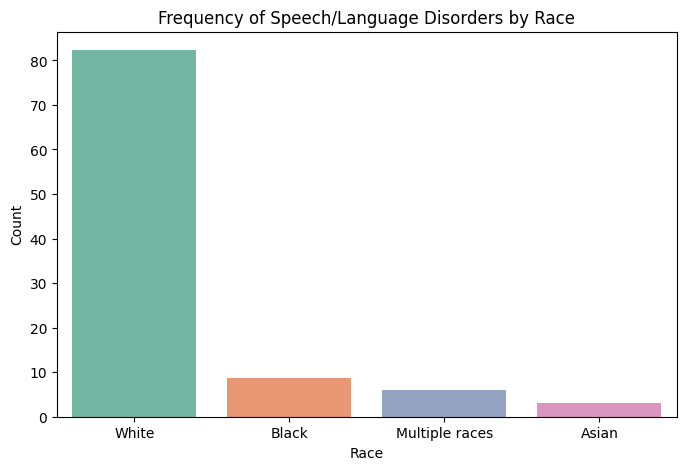

In [ ]:
#Frequency by Race
plt.figure(figsize=(8, 5))
sns.countplot(data=df,
              x='Race',
              order=df['Race'].value_counts().index,
              palette=sns.color_palette("Set2"),
              stat='percent',
              legend='auto')
plt.title("Frequency of Speech/Language Disorders by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

The results and correlations having to do with race should be interpreted with caution as there is a higher amount included in the sample. This sample is unprepresentative of the population.

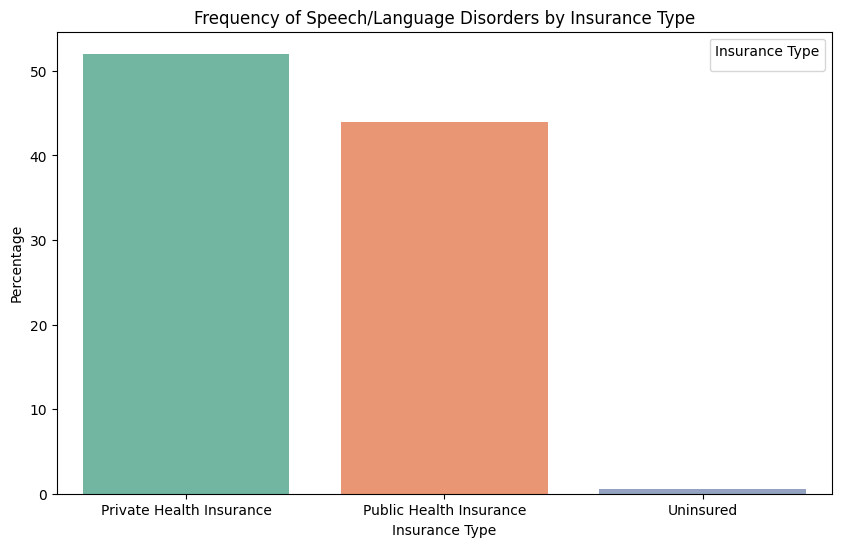

In [ ]:
#Frequency by insurance type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Insurance Type',
              order=df['Insurance Type'].value_counts().index,
              hue_order=df['Insurance Type'].value_counts().index,
              palette='Set2',
              stat='percent',
              color=
              legend='auto')
plt.title("Frequency of Speech/Language Disorders by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Percentage")
plt.legend(title="Insurance Type")
plt.show()

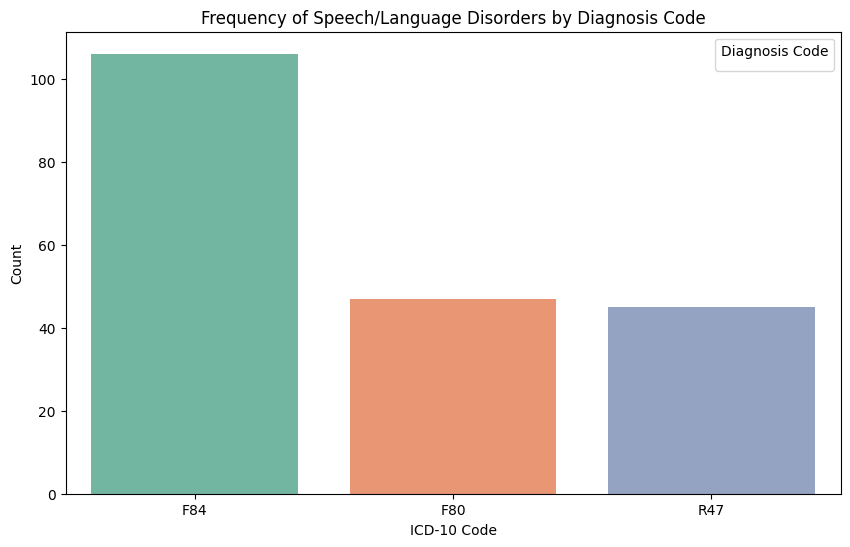

In [ ]:
#Frequency by diagnosis code
plt.figure(figsize=(10, 6))
sns.countplot(data=df,
              x='ICD10CDX',
              order=df['ICD10CDX'].value_counts().index,
              palette=sns.color_palette("Set2"),
              stat='count',
              legend='auto')
plt.title("Frequency of Speech/Language Disorders by Diagnosis Code")
plt.xlabel("ICD-10 Code")
plt.legend(title="Diagnosis Code")
plt.ylabel("Count")
plt.show()

The most frequent diagnosis code is F84 for Autism Spectrum Disorder, followed by F80 for Specific Developmental Disorders of Speech and Language (articulation, expressive, receptive), and R47 for other speech disturbances such as Dysarthira and Aphasia is the least frequently occuring code.  

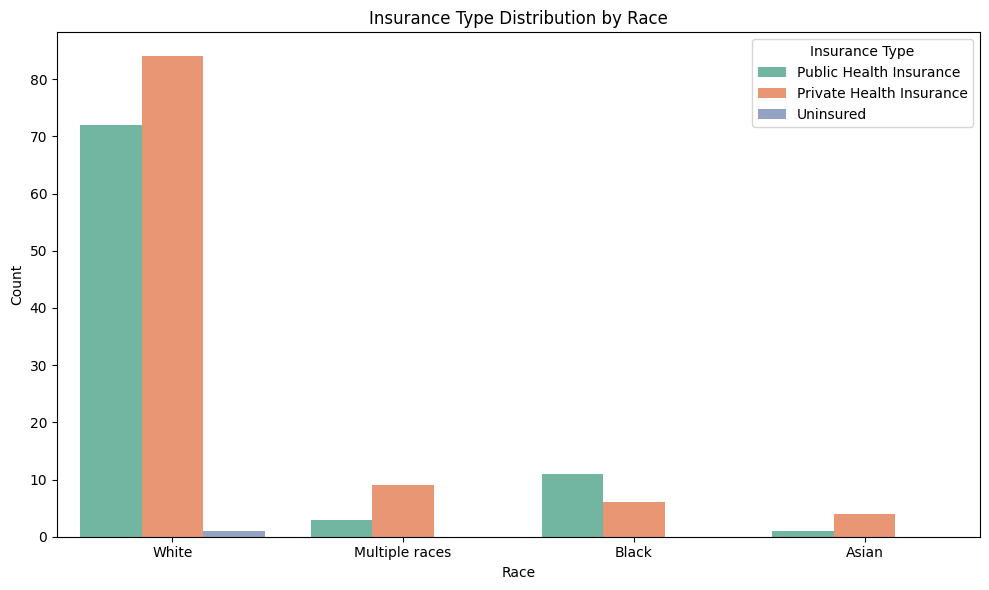

In [ ]:
#Frequency of Insurance Type by Race
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Race', hue='Insurance Type', palette='Set2')
plt.title("Insurance Type Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.legend(title="Insurance Type")
plt.tight_layout()
plt.show()

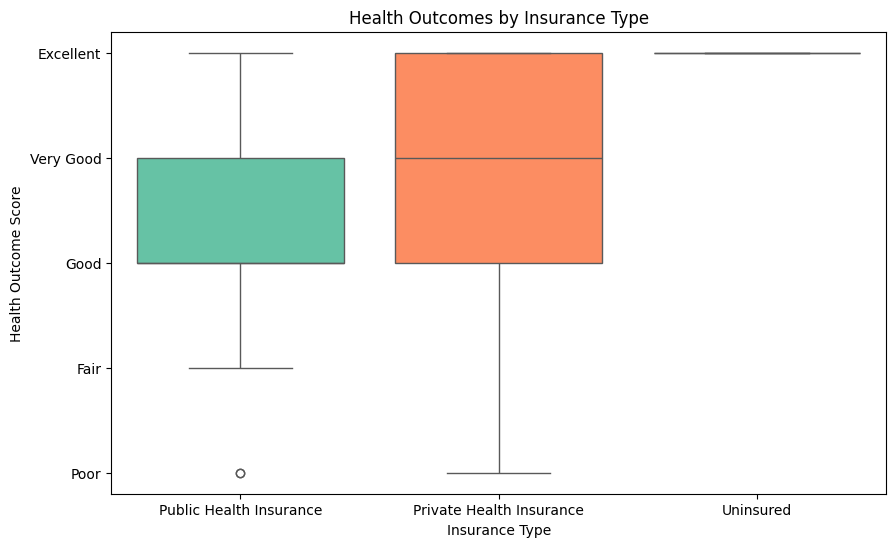

In [ ]:
# Define desired ascending order for Health Status
health_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

# Convert to ordered categorical type
df['Health Status'] = pd.Categorical(df['Health Status'], categories=health_order, ordered=True)

# Plot with reordered y-axis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Insurance Type',
            y='Health Status',
            orient='v',
            palette='Set2', saturation=1,legend='auto')
plt.title("Health Outcomes by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Health Outcome Score")
plt.show()


According to this graph, individuals with private health insurance rate their health from excellent-good, while public health inssurees report very good-good.

In [ ]:
# Chi-square test will see if there is a significant relationship between insurance type and health status

import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(df['INSURC22'], df['HHCOND'])
# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)


# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant relationship between insurance type and health status")
else:
    print("There is no statistically significant relationship between insurance type and health status")


Chi-square statistic: 3.322809309448495
P-value: 0.6503514392781813
Degrees of freedom: 5
Expected frequencies:
 [[23.92929293 79.07070707]
 [20.21212121 66.78787879]
 [ 0.23232323  0.76767677]
 [ 0.46464646  1.53535354]
 [ 0.92929293  3.07070707]
 [ 0.23232323  0.76767677]]
There is no statistically significant relationship between insurance type and health status


In [ ]:
#Chi-square between english proficiency and health status
# Create a contingency table
contingency_table = pd.crosstab(df['HWELLSPK'], df['HHCOND'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)


# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant relationship between english proficiency and health status")
else:
    print("There is no statistically significant relationship between english proficiency and health status")


Chi-square statistic: 4.668008463489015
P-value: 0.32308811918668695
Degrees of freedom: 4
Expected frequencies:
 [[25.09090909 82.90909091]
 [ 3.02020202  9.97979798]
 [ 0.46464646  1.53535354]
 [ 0.23232323  0.76767677]
 [17.19191919 56.80808081]]
There is no statistically significant relationship between english proficiency and health status


In [ ]:
#Chi-square between race and health status
# Create a contingency table
contingency_table = pd.crosstab(df['RACEV1X'], df['HHCOND'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)


# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant relationship between race and health status")
else:
    print("There is no statistically significant relationship between race and health status")


Chi-square statistic: 1.6768062814686604
P-value: 0.642102541017975
Degrees of freedom: 3
Expected frequencies:
 [[ 37.86868687 125.13131313]
 [  3.94949495  13.05050505]
 [  1.39393939   4.60606061]
 [  2.78787879   9.21212121]]
There is no statistically significant relationship between race and health status


In [ ]:
#Chi-square between diagnosis code and health status
# Create a contingency table
contingency_table = pd.crosstab(df['ICD10CDX'], df['HHCOND'])  # Example: Race vs. Health Status

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)


# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant relationship between diagnosis and health status")
else:
    print("There is no statistically significant relationship between diagnosis and health status")

Chi-square statistic: 0.9898663104797409
P-value: 0.6096116552792689
Degrees of freedom: 2
Expected frequencies:
 [[10.91919192 36.08080808]
 [24.62626263 81.37373737]
 [10.45454545 34.54545455]]
There is no statistically significant relationship between diagnosis and health status
